In [1]:
import tensorflow as tf
import tensorflow_hub as hub
# For saving 'feature vectors' into a txt file
import numpy as np
# Glob for reading file names in a folder
import glob
import os.path
from tqdm import tqdm
import ntpath
import warnings
import cv2
from annoy import AnnoyIndex
from scipy import spatial
warnings.filterwarnings('ignore')
from operator import itemgetter

In [2]:
def load_img(path):
    # Reads the image file and returns data type of string
    img = tf.io.read_file(path)
    # Decodes the image to W x H x 3 shape tensor with type of uint8
    img = tf.io.decode_jpeg(img, channels=3)
    # Resizes the image to 224 x 224 x 3 shape tensor
    img = tf.image.resize_with_pad(img, 224, 224)
    # Converts the data type of uint8 to float32 by adding a new axis
    # img becomes 1 x 224 x 224 x 3 tensor with data type of float32
    # This is required for the mobilenet model we are using
    img = tf.image.convert_image_dtype(img,tf.float32)[tf.newaxis, ...]

    return img

In [3]:
def match_id(filename):
    product_id = '_'.join(filename.split('_')[:-1])
    return product_id

In [4]:
image_paths= glob.glob('/Users/rishabshekar/Downloads/Dataset/*.jpeg')

In [5]:
image_paths = image_paths[:200]

In [6]:
len(image_paths)

200

In [7]:
def get_image_feature_vectors(path):
    module_handle = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4"
    # Loads the module
    module = hub.load(module_handle)
    # Loops through all images in a local folder

    #print(path)
    # Loads and pre-process the image
    img = load_img(path)
    # Calculate the image feature vector of the img
    features = module(img)
    # Remove single-dimensional entries from the 'features' array  
    feature_set = np.squeeze(features)

    # Saves the image feature vectors into a file for later use
    outfile_name = os.path.basename(filename) + ".npz"

    out_path = os.path.join('/Users/rishabshekar/Downloads/Dataset/',outfile_name)
    # Saves the 'feature_set' to a text file
    np.savetxt(out_path, feature_set, delimiter=',')

In [8]:
def get_features(img, image_path): 
     # Definition of module with using tfhub.dev
    module_handle = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4"
    # Loads the module
    module = hub.load(module_handle)
    features = module(img)
    # Remove single-dimensional entries from the 'features' array  
    feature_set = np.squeeze(features)
    #print(image_path)

    # Saves the image feature vectors into a file for later use
    outfile_name = os.path.basename(image_path) + ".npz"

    out_path = os.path.join('/Users/rishabshekar/Downloads/Dataset/',outfile_name)
    # Saves the 'feature_set' to a text file
    np.savetxt(out_path, feature_set, delimiter=',')
    vector = np.loadtxt(out_path)
    return vector
    

In [9]:
#image_paths= glob.glob('/Users/rishabshekar/Downloads/Dataset/*.jpeg')
vectorfiles = glob.glob('/Users/rishabshekar/Downloads/Dataset/*.npz')
# compute styles
image_style_embeddings = {}

for image_path in tqdm(image_paths): 
    image_tensor = load_img(image_path)
    vector = get_features(image_tensor, image_path)
    image_style_embeddings[ntpath.basename(image_path)] = vector
    

  2%|▏         | 4/200 [00:06<05:35,  1.71s/it]

  2%|▎         | 5/200 [00:08<05:27,  1.68s/it]

  3%|▎         | 6/200 [00:10<05:24,  1.67s/it]

  4%|▎         | 7/200 [00:11<05:11,  1.61s/it]

  4%|▍         | 8/200 [00:13<05:25,  1.70s/it]

  4%|▍         | 9/200 [00:15<05:42,  1.80s/it]

  5%|▌         | 10/200 [00:17<05:37,  1.77s/it]

  6%|▌         | 11/200 [00:19<05:37,  1.79s/it]

  6%|▌         | 12/200 [00:20<05:34,  1.78s/it]

  6%|▋         | 13/200 [00:22<05:43,  1.84s/it]

  7%|▋         | 14/200 [00:24<05:40,  1.83s/it]

  8%|▊         | 15/200 [00:26<05:38,  1.83s/it]

  8%|▊         | 16/200 [00:28<05:25,  1.77s/it]

  8%|▊         | 17/200 [00:29<05:08,  1.69s/it]

  9%|▉         | 18/200 [00:31<05:09,  1.70s/it]

 10%|▉         | 19/200 [00:32<05:04,  1.68s/it]

 10%|█         | 20/200 [00:34<04:51,  1.62s/it]

 10%|█         | 21/200 [00:36<04:57,  1.66s/it]

 11%|█         | 22/200 [00:37<04:55,  1.66s/it]

 12%|█▏        | 23/200 [00:39<04:55,  1.67s/it]

 12%|█▏        | 24/200 [00:41<04:43,  1.61s/it]

 12%|█▎        | 25/200 [00:42<04:48,  1.65s/it]

 13%|█▎        | 26/200 [00:44<04:46,  1.65s/it]

 14%|█▎        | 27/200 [00:45<04:34,  1.59s/it]

 14%|█▍        | 28/200 [00:47<04:40,  1.63s/it]

 14%|█▍        | 29/200 [00:49<04:40,  1.64s/it]

 15%|█▌        | 30/200 [00:50<04:39,  1.64s/it]

 16%|█▌        | 31/200 [00:52<04:28,  1.59s/it]

 16%|█▌        | 32/200 [00:54<04:34,  1.63s/it]

 16%|█▋        | 33/200 [00:55<04:32,  1.63s/it]

 17%|█▋        | 34/200 [00:57<04:24,  1.59s/it]

 18%|█▊        | 35/200 [00:58<04:31,  1.65s/it]

 18%|█▊        | 36/200 [01:00<04:30,  1.65s/it]

 18%|█▊        | 37/200 [01:02<04:21,  1.60s/it]

 19%|█▉        | 38/200 [01:03<04:27,  1.65s/it]

 20%|█▉        | 39/200 [01:05<04:26,  1.66s/it]

 20%|██        | 40/200 [01:07<04:26,  1.66s/it]

 20%|██        | 41/200 [01:08<04:16,  1.61s/it]

 21%|██        | 42/200 [01:10<04:22,  1.66s/it]

 22%|██▏       | 43/200 [01:12<04:18,  1.65s/it]

 22%|██▏       | 44/200 [01:13<04:09,  1.60s/it]

 22%|██▎       | 45/200 [01:15<04:14,  1.64s/it]

 23%|██▎       | 46/200 [01:16<04:11,  1.63s/it]

 24%|██▎       | 47/200 [01:18<04:12,  1.65s/it]

 24%|██▍       | 48/200 [01:20<04:03,  1.60s/it]

 24%|██▍       | 49/200 [01:21<04:08,  1.64s/it]

 25%|██▌       | 50/200 [01:23<04:06,  1.64s/it]

 26%|██▌       | 51/200 [01:24<03:56,  1.59s/it]

 26%|██▌       | 52/200 [01:26<04:04,  1.65s/it]

 26%|██▋       | 53/200 [01:28<04:03,  1.66s/it]

 27%|██▋       | 54/200 [01:30<04:01,  1.65s/it]

 28%|██▊       | 55/200 [01:31<03:52,  1.60s/it]

 28%|██▊       | 56/200 [01:33<03:55,  1.64s/it]

 28%|██▊       | 57/200 [01:34<03:53,  1.63s/it]

 29%|██▉       | 58/200 [01:36<03:45,  1.59s/it]

 30%|██▉       | 59/200 [01:38<03:51,  1.64s/it]

 30%|███       | 60/200 [01:39<03:47,  1.63s/it]

 30%|███       | 61/200 [01:41<03:49,  1.65s/it]

 31%|███       | 62/200 [01:42<03:40,  1.60s/it]

 32%|███▏      | 63/200 [01:44<03:45,  1.65s/it]

 32%|███▏      | 64/200 [01:46<03:43,  1.65s/it]

 32%|███▎      | 65/200 [01:47<03:36,  1.61s/it]

 33%|███▎      | 66/200 [01:49<03:40,  1.65s/it]

 34%|███▎      | 67/200 [01:51<03:38,  1.64s/it]

 34%|███▍      | 68/200 [01:52<03:31,  1.60s/it]

 34%|███▍      | 69/200 [01:54<03:33,  1.63s/it]

 35%|███▌      | 70/200 [01:56<03:31,  1.63s/it]

 36%|███▌      | 71/200 [01:57<03:31,  1.64s/it]

 36%|███▌      | 72/200 [01:59<03:25,  1.60s/it]

 36%|███▋      | 73/200 [02:00<03:28,  1.64s/it]

 37%|███▋      | 74/200 [02:02<03:26,  1.64s/it]

 38%|███▊      | 75/200 [02:04<03:21,  1.61s/it]

 38%|███▊      | 76/200 [02:05<03:24,  1.65s/it]

 38%|███▊      | 77/200 [02:07<03:25,  1.67s/it]

 39%|███▉      | 78/200 [02:09<03:34,  1.75s/it]

 40%|███▉      | 79/200 [02:11<03:34,  1.77s/it]

 40%|████      | 80/200 [02:13<03:44,  1.87s/it]

 40%|████      | 81/200 [02:15<03:45,  1.90s/it]

 41%|████      | 82/200 [02:16<03:30,  1.79s/it]

 42%|████▏     | 83/200 [02:18<03:29,  1.79s/it]

 42%|████▏     | 84/200 [02:20<03:24,  1.76s/it]

 42%|████▎     | 85/200 [02:21<03:14,  1.69s/it]

 43%|████▎     | 86/200 [02:23<03:16,  1.73s/it]

 44%|████▎     | 87/200 [02:25<03:13,  1.71s/it]

 44%|████▍     | 88/200 [02:27<03:10,  1.70s/it]

 44%|████▍     | 89/200 [02:28<03:02,  1.65s/it]

 45%|████▌     | 90/200 [02:30<03:05,  1.68s/it]

 46%|████▌     | 91/200 [02:32<03:03,  1.68s/it]

 46%|████▌     | 92/200 [02:33<02:55,  1.63s/it]

 46%|████▋     | 93/200 [02:35<02:58,  1.67s/it]

 47%|████▋     | 94/200 [02:37<02:56,  1.66s/it]

 48%|████▊     | 95/200 [02:38<02:54,  1.66s/it]

 48%|████▊     | 96/200 [02:40<02:47,  1.61s/it]

 48%|████▊     | 97/200 [02:41<02:49,  1.65s/it]

 49%|████▉     | 98/200 [02:43<02:47,  1.64s/it]

 50%|████▉     | 99/200 [02:45<02:41,  1.59s/it]

 50%|█████     | 100/200 [02:46<02:44,  1.64s/it]

 50%|█████     | 101/200 [02:48<02:42,  1.64s/it]

 51%|█████     | 102/200 [02:50<02:41,  1.64s/it]

 52%|█████▏    | 103/200 [02:51<02:35,  1.60s/it]

 52%|█████▏    | 104/200 [02:53<02:37,  1.64s/it]

 52%|█████▎    | 105/200 [02:54<02:35,  1.63s/it]

 53%|█████▎    | 106/200 [02:56<02:29,  1.59s/it]

 54%|█████▎    | 107/200 [02:58<02:32,  1.64s/it]

 54%|█████▍    | 108/200 [02:59<02:31,  1.65s/it]

 55%|█████▍    | 109/200 [03:01<02:32,  1.67s/it]

 55%|█████▌    | 110/200 [03:03<02:32,  1.70s/it]

 56%|█████▌    | 111/200 [03:05<02:44,  1.84s/it]

 56%|█████▌    | 112/200 [03:07<02:44,  1.86s/it]

 56%|█████▋    | 113/200 [03:08<02:34,  1.78s/it]

 57%|█████▋    | 114/200 [03:10<02:34,  1.79s/it]

 57%|█████▊    | 115/200 [03:12<02:28,  1.75s/it]

 58%|█████▊    | 116/200 [03:13<02:19,  1.66s/it]

 58%|█████▊    | 117/200 [03:15<02:19,  1.69s/it]

 59%|█████▉    | 118/200 [03:17<02:16,  1.67s/it]

 60%|█████▉    | 119/200 [03:18<02:15,  1.67s/it]

 60%|██████    | 120/200 [03:20<02:09,  1.62s/it]

 60%|██████    | 121/200 [03:22<02:10,  1.66s/it]

 61%|██████    | 122/200 [03:23<02:09,  1.66s/it]

 62%|██████▏   | 123/200 [03:25<02:04,  1.61s/it]

 62%|██████▏   | 124/200 [03:27<02:05,  1.66s/it]

 62%|██████▎   | 125/200 [03:28<02:04,  1.66s/it]

 63%|██████▎   | 126/200 [03:30<02:02,  1.66s/it]

 64%|██████▎   | 127/200 [03:31<01:57,  1.61s/it]

 64%|██████▍   | 128/200 [03:33<01:58,  1.65s/it]

 64%|██████▍   | 129/200 [03:35<01:56,  1.64s/it]

 65%|██████▌   | 130/200 [03:36<01:51,  1.59s/it]

 66%|██████▌   | 131/200 [03:38<01:54,  1.65s/it]

 66%|██████▌   | 132/200 [03:40<01:51,  1.65s/it]

 66%|██████▋   | 133/200 [03:41<01:46,  1.60s/it]

 67%|██████▋   | 134/200 [03:43<01:48,  1.64s/it]

 68%|██████▊   | 135/200 [03:45<01:46,  1.64s/it]

 68%|██████▊   | 136/200 [03:46<01:45,  1.64s/it]

 68%|██████▊   | 137/200 [03:48<01:40,  1.60s/it]

 69%|██████▉   | 138/200 [03:49<01:41,  1.63s/it]

 70%|██████▉   | 139/200 [03:51<01:40,  1.64s/it]

 70%|███████   | 140/200 [03:53<01:35,  1.59s/it]

 70%|███████   | 141/200 [03:54<01:36,  1.64s/it]

 71%|███████   | 142/200 [03:56<01:35,  1.64s/it]

 72%|███████▏  | 143/200 [03:58<01:33,  1.64s/it]

 72%|███████▏  | 144/200 [03:59<01:29,  1.59s/it]

 72%|███████▎  | 145/200 [04:01<01:29,  1.63s/it]

 73%|███████▎  | 146/200 [04:02<01:28,  1.64s/it]

 74%|███████▎  | 147/200 [04:04<01:23,  1.58s/it]

 74%|███████▍  | 148/200 [04:06<01:25,  1.64s/it]

 74%|███████▍  | 149/200 [04:07<01:23,  1.64s/it]

 75%|███████▌  | 150/200 [04:09<01:21,  1.64s/it]

 76%|███████▌  | 151/200 [04:10<01:18,  1.59s/it]

 76%|███████▌  | 152/200 [04:12<01:18,  1.64s/it]

 76%|███████▋  | 153/200 [04:14<01:17,  1.64s/it]

 77%|███████▋  | 154/200 [04:15<01:13,  1.60s/it]

 78%|███████▊  | 155/200 [04:17<01:13,  1.63s/it]

 78%|███████▊  | 156/200 [04:19<01:11,  1.63s/it]

 78%|███████▊  | 157/200 [04:20<01:10,  1.65s/it]

 79%|███████▉  | 158/200 [04:22<01:07,  1.62s/it]

 80%|███████▉  | 159/200 [04:24<01:07,  1.65s/it]

 80%|████████  | 160/200 [04:25<01:06,  1.67s/it]

 80%|████████  | 161/200 [04:27<01:03,  1.62s/it]

 81%|████████  | 162/200 [04:29<01:02,  1.65s/it]

 82%|████████▏ | 163/200 [04:30<01:00,  1.64s/it]

 82%|████████▏ | 164/200 [04:32<00:56,  1.58s/it]

 82%|████████▎ | 165/200 [04:33<00:56,  1.63s/it]

 83%|████████▎ | 166/200 [04:35<00:55,  1.63s/it]

 84%|████████▎ | 167/200 [04:37<00:53,  1.63s/it]

 84%|████████▍ | 168/200 [04:38<00:50,  1.59s/it]

 84%|████████▍ | 169/200 [04:40<00:50,  1.64s/it]

 85%|████████▌ | 170/200 [04:41<00:48,  1.63s/it]

 86%|████████▌ | 171/200 [04:43<00:45,  1.57s/it]

 86%|████████▌ | 172/200 [04:45<00:45,  1.61s/it]

 86%|████████▋ | 173/200 [04:46<00:43,  1.62s/it]

 87%|████████▋ | 174/200 [04:48<00:42,  1.63s/it]

 88%|████████▊ | 175/200 [04:49<00:39,  1.58s/it]

 88%|████████▊ | 176/200 [04:51<00:39,  1.63s/it]

 88%|████████▊ | 177/200 [04:53<00:37,  1.63s/it]

 89%|████████▉ | 178/200 [04:54<00:34,  1.58s/it]

 90%|████████▉ | 179/200 [04:56<00:34,  1.62s/it]

 90%|█████████ | 180/200 [04:58<00:32,  1.63s/it]

 90%|█████████ | 181/200 [04:59<00:30,  1.59s/it]

 91%|█████████ | 182/200 [05:01<00:29,  1.64s/it]

 92%|█████████▏| 183/200 [05:02<00:27,  1.63s/it]

 92%|█████████▏| 184/200 [05:04<00:26,  1.64s/it]

 92%|█████████▎| 185/200 [05:06<00:23,  1.59s/it]

 93%|█████████▎| 186/200 [05:07<00:22,  1.63s/it]

 94%|█████████▎| 187/200 [05:09<00:21,  1.68s/it]

 94%|█████████▍| 188/200 [05:11<00:20,  1.73s/it]

 94%|█████████▍| 189/200 [05:13<00:19,  1.82s/it]

 95%|█████████▌| 190/200 [05:15<00:18,  1.88s/it]

 96%|█████████▌| 191/200 [05:17<00:16,  1.87s/it]

 96%|█████████▌| 192/200 [05:18<00:14,  1.77s/it]

 96%|█████████▋| 193/200 [05:20<00:12,  1.83s/it]

 97%|█████████▋| 194/200 [05:22<00:10,  1.80s/it]

 98%|█████████▊| 195/200 [05:24<00:08,  1.71s/it]

 98%|█████████▊| 196/200 [05:25<00:06,  1.72s/it]

 98%|█████████▊| 197/200 [05:27<00:05,  1.79s/it]

 99%|█████████▉| 198/200 [05:29<00:03,  1.90s/it]

100%|█████████▉| 199/200 [05:31<00:01,  1.81s/it]

100%|██████████| 200/200 [05:33<00:00,  1.67s/it]


In [10]:
def cluster():
    print("-------Annoy Index Generation----------------")
    # Defining data structures as empty dict
    file_index_to_file_name = {}
    file_index_to_file_vector = {}
    file_index_to_product_id = {}
    # Configuring annoy parameters
    dims = 1792
    n_nearest_neighbors = 20
    trees = 10000
    # Reads all file names which stores feature vectors
    allfiles = glob.glob('/Users/rishabshekar/Downloads/Dataset/*.npz')

    t = AnnoyIndex(dims, metric='angular')
    
    for file_index, i in enumerate(allfiles):
    # Reads feature vectors and assigns them into the file_vector 
        file_vector = np.loadtxt(i)

        # Assigns file_name, feature_vectors and corresponding product_id
        file_name = os.path.basename(i).split('.')[0]
        file_index_to_file_name[file_index] = file_name
        file_index_to_file_vector[file_index] = file_vector
        file_index_to_product_id[file_index] = match_id(file_name)

        # Adds image feature vectors into annoy index   
        t.add_item(file_index, file_vector)

        print("---------------------------------")
        print("Annoy index     : %s" %file_index)
        print("Image file name : %s" %file_name)
        print("Product id      : %s" %file_index_to_product_id[file_index])
        #print("--- %.2f minutes passed ---------" % ((time.time() - start_time)/60))


    # Builds annoy index
    t.build(trees)

    print ("Step.1 - ANNOY index generation - Finished")
    print ("Step.2 - Similarity score calculation - Started ") 
  
    global named_nearest_neighbors
    named_nearest_neighbors = []

  # Loops through all indexed items
    for i in file_index_to_file_name.keys():

    # Assigns master file_name, image feature vectors and product id values
        master_file_name = file_index_to_file_name[i]
        master_vector = file_index_to_file_vector[i]
        master_product_id = file_index_to_product_id[i]

        # Calculates the nearest neighbors of the master item
        nearest_neighbors = t.get_nns_by_item(i, n_nearest_neighbors)

        # Loops through the nearest neighbors of the master item
        for j in nearest_neighbors:

            # Assigns file_name, image feature vectors and product id values of the similar item
            neighbor_file_name = file_index_to_file_name[j]
            neighbor_file_vector = file_index_to_file_vector[j]
            neighbor_product_id = file_index_to_product_id[j]

            # Calculates the similarity score of the similar item
            similarity = 1 - spatial.distance.cosine(master_vector, neighbor_file_vector)
            rounded_similarity = int((similarity * 10000)) / 10000.0

            # Appends master product id with the similarity score 
            # and the product id of the similar items
            named_nearest_neighbors.append({
            'similarity': rounded_similarity,
            'master_pi': master_product_id,
            'similar_pi': neighbor_product_id})
#     print(named_nearest_neighbors)
#     print(type(named_nearest_neighbors))
            
#     return named_nearest_neighbors

In [11]:
#image_paths = glob.glob('/Users/rishabshekar/Downloads/Dataset/*.jpeg')
print(f'Founnd [{len(image_paths)}] images')

images = []
for image_path in image_paths:
    image = cv2.imread(image_path, 3)
    b,g,r = cv2.split(image)           # get b, g, r
    image = cv2.merge([r,g,b])         # switch it to r, g, b
    image = cv2.resize(image, (200, 200))
    product_id = match_id(ntpath.basename(image_path))
    images.append({
      'image_path' : ntpath.basename(image_path),
        'image' : image,
       'product_id':product_id
    })
#     images['image_path'] = ntpath.basename(image_path)
#     images['image'] = image
#     #images[ntpath.basename(image_path)] = image
#     product_id = match_id(ntpath.basename(image_path))
#     images['product_id'] = product_id

Founnd [200] images


In [12]:
cluster()

-------Annoy Index Generation----------------
---------------------------------
Annoy index     : 0
Image file name : 1000014826_683224_1
Product id      : 1000014826_683224
---------------------------------
Annoy index     : 1
Image file name : 1000012591_283383_1
Product id      : 1000012591_283383
---------------------------------
Annoy index     : 2
Image file name : 1000016591_1260132_3
Product id      : 1000016591_1260132
---------------------------------
Annoy index     : 3
Image file name : 1000005892_51661_1
Product id      : 1000005892_51661
---------------------------------
Annoy index     : 4
Image file name : 1000005906_1198165_1
Product id      : 1000005906_1198165
---------------------------------
Annoy index     : 5
Image file name : 1000005296_1541795_4
Product id      : 1000005296_1541795
---------------------------------
Annoy index     : 6
Image file name : 1000018483_390709_4
Product id      : 1000018483_390709
---------------------------------
Annoy index     : 7


---------------------------------
Annoy index     : 93
Image file name : 1000014204_43504_2
Product id      : 1000014204_43504
---------------------------------
Annoy index     : 94
Image file name : 1000018433_119097_2
Product id      : 1000018433_119097
---------------------------------
Annoy index     : 95
Image file name : 1000020743_162205_0
Product id      : 1000020743_162205
---------------------------------
Annoy index     : 96
Image file name : 1000017981_1556417_1
Product id      : 1000017981_1556417
---------------------------------
Annoy index     : 97
Image file name : 1000018657_2832634_1
Product id      : 1000018657_2832634
---------------------------------
Annoy index     : 98
Image file name : 1000006450_471043_1
Product id      : 1000006450_471043
---------------------------------
Annoy index     : 99
Image file name : 1000014826_1410870_3
Product id      : 1000014826_1410870
---------------------------------
Annoy index     : 100
Image file name : 1000014300_328844_2

---------------------------------
Annoy index     : 160
Image file name : 1000014621_969225_1
Product id      : 1000014621_969225
---------------------------------
Annoy index     : 161
Image file name : 1000000489_1233988_1
Product id      : 1000000489_1233988
---------------------------------
Annoy index     : 162
Image file name : 1000005736_475217_1
Product id      : 1000005736_475217
---------------------------------
Annoy index     : 163
Image file name : 1000006420_369254_2
Product id      : 1000006420_369254
---------------------------------
Annoy index     : 164
Image file name : 1000018433_509959_4
Product id      : 1000018433_509959
---------------------------------
Annoy index     : 165
Image file name : 1000000489_2395275_1
Product id      : 1000000489_2395275
---------------------------------
Annoy index     : 166
Image file name : 1000008611_4888778_1
Product id      : 1000008611_4888778
---------------------------------
Annoy index     : 167
Image file name : 1000001703

In [13]:
#named_nearest_neighbors=[]
cluster()
print("Printing named_nearest_neighbors")
print(named_nearest_neighbors)
print(type(named_nearest_neighbors))

-------Annoy Index Generation----------------
---------------------------------
Annoy index     : 0
Image file name : 1000014826_683224_1
Product id      : 1000014826_683224
---------------------------------
Annoy index     : 1
Image file name : 1000012591_283383_1
Product id      : 1000012591_283383
---------------------------------
Annoy index     : 2
Image file name : 1000016591_1260132_3
Product id      : 1000016591_1260132
---------------------------------
Annoy index     : 3
Image file name : 1000005892_51661_1
Product id      : 1000005892_51661
---------------------------------
Annoy index     : 4
Image file name : 1000005906_1198165_1
Product id      : 1000005906_1198165
---------------------------------
Annoy index     : 5
Image file name : 1000005296_1541795_4
Product id      : 1000005296_1541795
---------------------------------
Annoy index     : 6
Image file name : 1000018483_390709_4
Product id      : 1000018483_390709
---------------------------------
Annoy index     : 7


---------------------------------
Annoy index     : 66
Image file name : 1000010562_344570_4
Product id      : 1000010562_344570
---------------------------------
Annoy index     : 67
Image file name : 1000020743_5730464_1
Product id      : 1000020743_5730464
---------------------------------
Annoy index     : 68
Image file name : 1000009581_1156993_1
Product id      : 1000009581_1156993
---------------------------------
Annoy index     : 69
Image file name : 1000005296_1707734_1
Product id      : 1000005296_1707734
---------------------------------
Annoy index     : 70
Image file name : 1000013443_39966_1
Product id      : 1000013443_39966
---------------------------------
Annoy index     : 71
Image file name : 1000005870_333655_2
Product id      : 1000005870_333655
---------------------------------
Annoy index     : 72
Image file name : 1000016591_1183410_1
Product id      : 1000016591_1183410
---------------------------------
Annoy index     : 73
Image file name : 1000018606_927886_

---------------------------------
Annoy index     : 141
Image file name : 1000005597_3682227_1
Product id      : 1000005597_3682227
---------------------------------
Annoy index     : 142
Image file name : 1000014148_53965_1
Product id      : 1000014148_53965
---------------------------------
Annoy index     : 143
Image file name : 1000014467_3872061_1
Product id      : 1000014467_3872061
---------------------------------
Annoy index     : 144
Image file name : 1000020751_1093721_1
Product id      : 1000020751_1093721
---------------------------------
Annoy index     : 145
Image file name : 1000007560_2156837_1
Product id      : 1000007560_2156837
---------------------------------
Annoy index     : 146
Image file name : 1000010562_39641_1
Product id      : 1000010562_39641
---------------------------------
Annoy index     : 147
Image file name : 1000016910_905983_4
Product id      : 1000016910_905983
---------------------------------
Annoy index     : 148
Image file name : 1000018483_2

In [14]:
print(image_paths[130])

/Users/rishabshekar/Downloads/Dataset/1000019289_79232_1.jpeg


In [15]:
from scipy import spatial
import matplotlib.pyplot as plt
def search_similar_image(reference_image, max_results):
    reference_image = '_'.join(reference_image.split('_')[:-1])
    print(reference_image)
    nearest = []
    #print(named_nearest_neighbors[1]['master_pi'])
    #f, ax = plt.subplots(1, max_results, figsize=(16, 8))
    for i in range (0, len(named_nearest_neighbors)):
        if(named_nearest_neighbors[i]['master_pi'] == reference_image):
            nearest.append({
                'similarity' : named_nearest_neighbors[i]['similarity'],
                'master_pi' : named_nearest_neighbors[i]['master_pi'],
                'similar_pi' : named_nearest_neighbors[i]['similar_pi']
            })
    f, ax = plt.subplots(1, max_results, figsize=(16, 8))
    for i in range(0, max_results):
        for j in range(0, len(images)):
            if(nearest[i]['similar_pi'] == images[j]['product_id']):
                ax[i].imshow(images[j]['image'])
                ax[i].set_axis_off()
                
    plt.show()

                
        

1000019289_79232


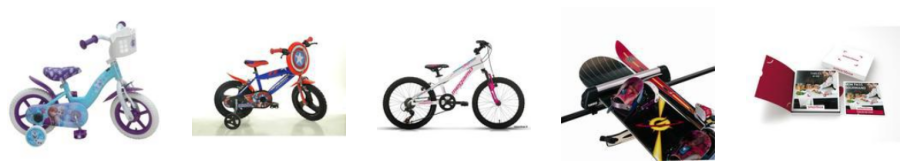

In [16]:
search_similar_image('1000019289_79232_1', 5)